# Analyzing Store Sales Forecasting Dataset

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [2]:
sales_df = pd.read_csv("stores_sales_forecasting5.csv", encoding="ISO-8859-1")
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
3,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
4,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
1794,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
1795,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
1796,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


## 1. Time Series & Forecasting

### Can we predict future sales trends based on historical data?

In [3]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
daily_sales = sales_df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
daily_sales['MA_7'] = daily_sales['Sales'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['Sales'].rolling(window=30).mean()

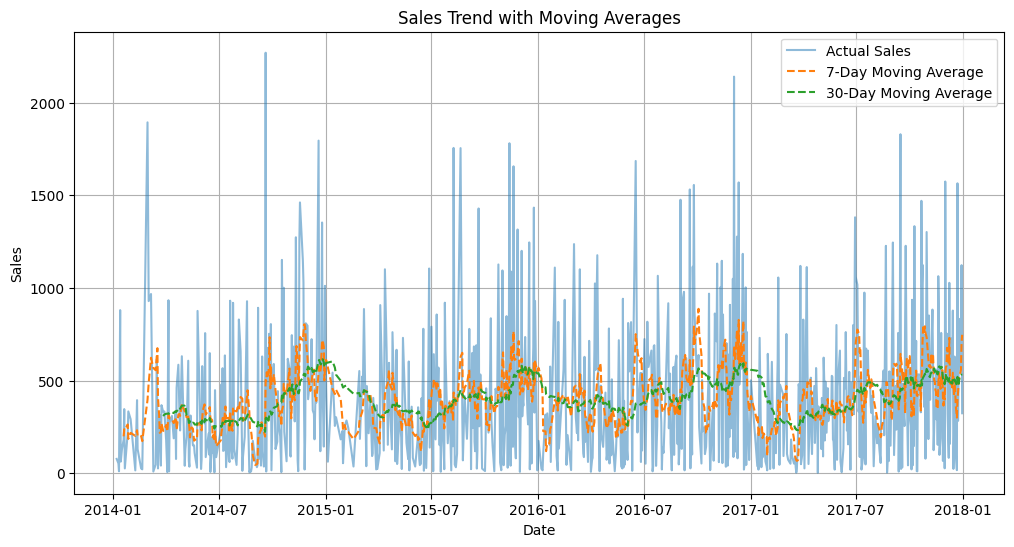

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Actual Sales', alpha=0.5)
plt.plot(daily_sales['Order Date'], daily_sales['MA_7'], label='7-Day Moving Average', linestyle='dashed')
plt.plot(daily_sales['Order Date'], daily_sales['MA_30'], label='30-Day Moving Average', linestyle='dashed')
plt.title("Sales Trend with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

### What are the monthly sales trends over time?

In [5]:
sales_df['Year-Month'] = sales_df['Order Date'].dt.to_period('M')
monthly_sales = sales_df.groupby('Year-Month').agg({'Sales': 'sum'}).reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

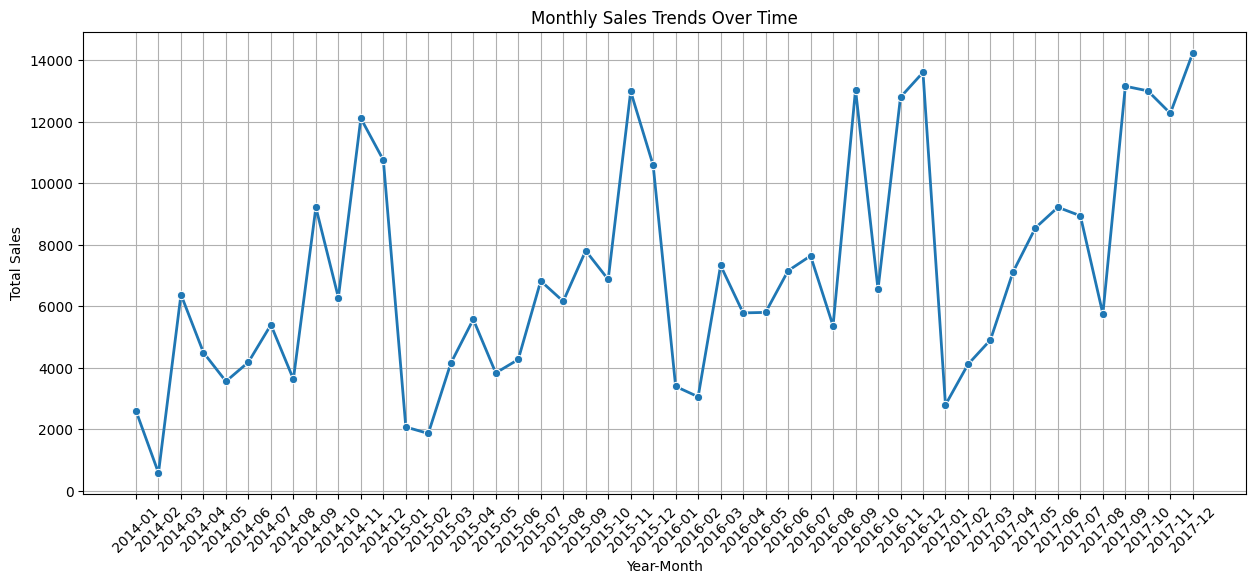

In [6]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year-Month', y='Sales', data=monthly_sales, marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## 2. Profitability & Discount Impact

### How does the discount impact profit?

In [7]:
Correlation_df= sales_df[["Discount","Profit"]]
print("Correlation between Discount and Profit: ")
Correlation_df.corr()

Correlation between Discount and Profit: 


,Discount,Profit
Discount,1.000000,-0.607083
Profit,-0.607083,1.000000


##### A negative correlation suggests that higher discounts are associated with lower profits.
##### A positive correlation suggests that higher discounts lead to higher profits.

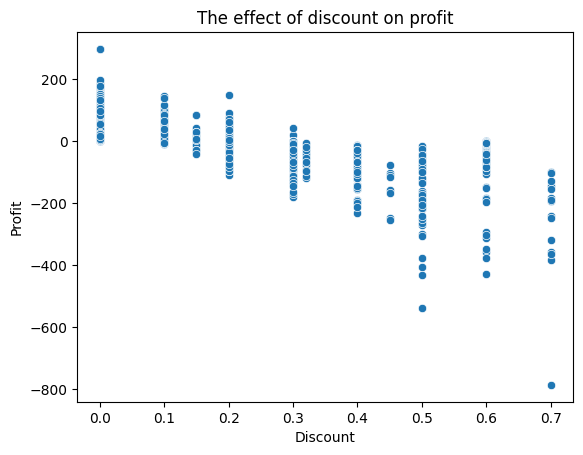

In [8]:
sns.scatterplot(x=sales_df["Discount"], y=sales_df["Profit"])
plt.title("The effect of discount on profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

##### Too many discounts significantly reduce profits.

### Is there a significant difference in sales based on different ship modes?

In [9]:
group_df= sales_df.groupby('Ship Mode')
print("Sales in different Ship Modes:")
group_df.Sales.agg(['mean','min','max','count'])

Sales in different Ship Modes:


,mean,min,max,count
Ship Mode,,,,
First Class,195.386317,1.988,674.352,282
Same Day,178.797460,5.820,673.344,100
Second Class,169.490619,2.328,687.400,356
Standard Class,192.958717,1.892,692.940,1060


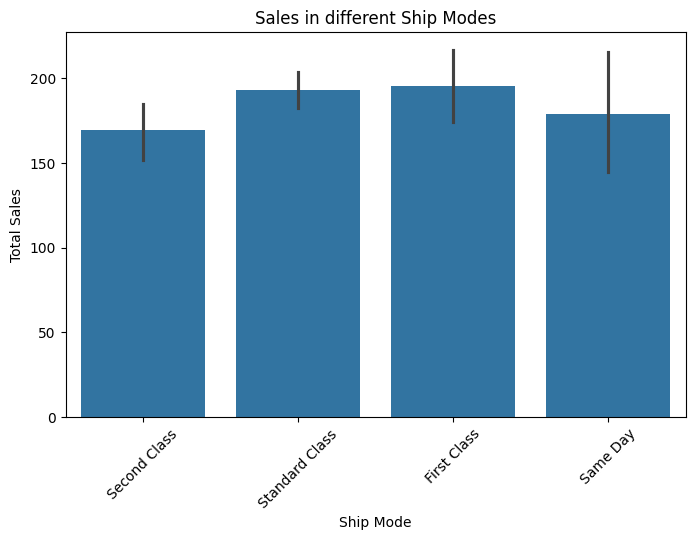

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Ship Mode', y='Sales', data=sales_df)
plt.title('Sales in different Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## 3. Customer Segmentation

### What is the average order value per customer segment?

In [11]:
group_df= sales_df.groupby('Segment')
print("Average Order Value Per Customer Segment:")
group_df.Quantity.agg(['mean'])

Average Order Value Per Customer Segment:


,mean
Segment,
Consumer,3.343487
Corporate,3.407477
Home Office,3.299035
